#Tugas Besar Machine Learning



*   Nama : Andrea Rahmadanisya
*   NIM : 1301184146

*   Nama : Rizka Nur Octvaniani
*   NIM  : 1301184125


# Supervised

## Load Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import copy
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
#lib for model
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score as f1
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import precision_score as prec
from sklearn.metrics import recall_score as recall

In [ ]:
DataTrain = pd.read_csv('kendaraan_train.csv')
DataTest = pd.read_csv('kendaraan_test.csv')

DataTrain = DataTrain.drop(["id"], axis=1)
DataTrain.head(3)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0


In [ ]:
DataTrain["Tertarik"].value_counts()

0    250825
1     35006
Name: Tertarik, dtype: int64

### Clean Data Train

In [ ]:
#fill NAN/missing value numerik using mean
DataTrain['Umur'].fillna(DataTrain['Umur'].mean(), inplace=True)
DataTrain['SIM'].fillna(DataTrain['SIM'].mean(), inplace=True)
DataTrain['Kode_Daerah'].fillna(DataTrain['Kode_Daerah'].mean(), inplace=True)
DataTrain['Sudah_Asuransi'].fillna(DataTrain['Sudah_Asuransi'].mean(), inplace=True)
DataTrain['Premi'].fillna(DataTrain['Premi'].mean(), inplace=True)
DataTrain['Kanal_Penjualan'].fillna(DataTrain['Kanal_Penjualan'].mean(), inplace=True)
DataTrain['Lama_Berlangganan'].fillna(DataTrain['Lama_Berlangganan'].mean(), inplace=True)
DataTrain['Tertarik'].fillna(DataTrain['Tertarik'].mean(), inplace=True)

#fill missing value categorical using modus
DataTrain['Jenis_Kelamin'].fillna('Pria', inplace=True)
DataTrain['Umur_Kendaraan'].fillna('1-2 Tahun', inplace=True)
DataTrain['Kendaraan_Rusak'].fillna('Pernah', inplace=True)

# len(DataTrain)
DataTrain.isna().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

In [ ]:
DataTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis_Kelamin      285831 non-null  object 
 1   Umur               285831 non-null  float64
 2   SIM                285831 non-null  float64
 3   Kode_Daerah        285831 non-null  float64
 4   Sudah_Asuransi     285831 non-null  float64
 5   Umur_Kendaraan     285831 non-null  object 
 6   Kendaraan_Rusak    285831 non-null  object 
 7   Premi              285831 non-null  float64
 8   Kanal_Penjualan    285831 non-null  float64
 9   Lama_Berlangganan  285831 non-null  float64
 10  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(1), object(3)
memory usage: 24.0+ MB


In [ ]:
DataTrain['Jenis_Kelamin']= LabelEncoder().fit_transform(DataTrain['Jenis_Kelamin']) 
DataTrain['Umur_Kendaraan']= LabelEncoder().fit_transform(DataTrain['Umur_Kendaraan']) 
# Train['Kendaraan_Rusak']= LabelEncoder().fit_transform(Train['Kendaraan_Rusak']) 

# Train['Jenis_Kelamin'] = (Train['Jenis_Kelamin']=='Pernah').astype(int)
# Train['Umur_Kendaraan'] = (Train['Umur_Kendaraan']=='Pernah').astype(int)
DataTrain['Kendaraan_Rusak'] = (DataTrain['Kendaraan_Rusak']=='Pernah').astype(int)

DataTrain.head(3)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,30.0,1.0,33.0,1.0,1,0,28029.0,152.0,97.0,0
1,0,48.0,1.0,39.0,0.0,2,1,25800.0,29.0,158.0,0
2,0,21.0,1.0,46.0,1.0,1,0,32733.0,160.0,119.0,0


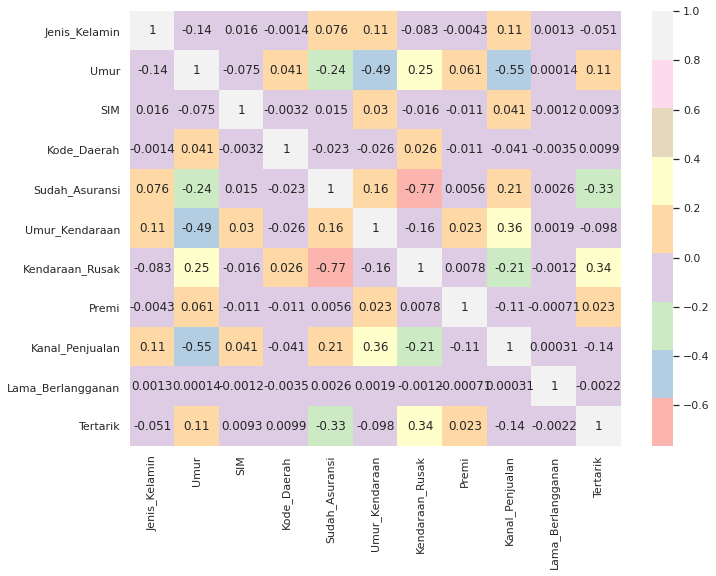

In [ ]:
#check correlation
sns.set(rc={'figure.figsize':(11,8)})
def heatmap(data):
  sns.heatmap(data.corr(), vmax=1, annot=True, cmap='Pastel1')

heatmap(DataTrain)

<Figure size 4320x4320 with 0 Axes>

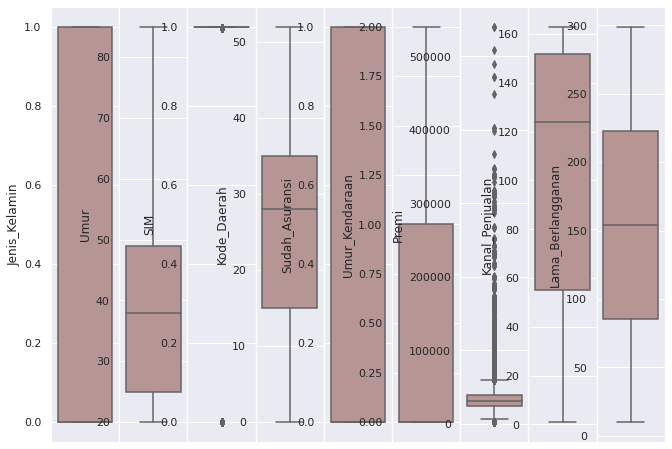

In [ ]:
#outlier
def Check_outlier(data):
  plt.figure(figsize=(60, 60))
  f, axes = plt.subplots(1, 9)
  sns.boxplot(y= data['Jenis_Kelamin'], ax= axes[0], color='rosybrown')
  sns.boxplot(y= data['Umur'], ax= axes[1], color='rosybrown')
  sns.boxplot(y= data['SIM'], ax=axes[2], color='rosybrown')
  sns.boxplot(y= data['Kode_Daerah'], ax=axes[3], color='rosybrown')
  sns.boxplot(y= data['Sudah_Asuransi'], ax=axes[4], color='rosybrown')
  sns.boxplot(y= data['Umur_Kendaraan'], ax=axes[5], color='rosybrown')
  sns.boxplot(y= data['Premi'], ax=axes[6], color='rosybrown')
  sns.boxplot(y= data['Kanal_Penjualan'], ax=axes[7], color='rosybrown')
  sns.boxplot(y= data['Lama_Berlangganan'], ax=axes[8], color='rosybrown')
  plt.subplots_adjust(wspace=0)

Check_outlier(DataTrain)

In [ ]:
#handle outlier 
while True:
  qlo1, qlo3 = np.percentile(DataTrain['SIM'],[25,75])
  iqrlo = qlo3 - qlo1
  lowerlo = qlo1 - (1.5 * iqrlo)
  upperlo = qlo3 + (1.5 * iqrlo)
  outlierlo = DataTrain[(DataTrain['SIM'] < (lowerlo)) | (DataTrain['SIM'] > (upperlo))]
  print('amount of outlier data',outlierlo.shape[0]) #amount of outlier data
  idxlo = outlierlo.index
  DataTrain.drop(idxlo, inplace=True) #drop outlier data
  if (outlierlo.shape[0] <= 0):
    break

DataTrain['SIM'].describe()

amount of outlier data 14988
amount of outlier data 0


count    270843.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: SIM, dtype: float64

In [ ]:
#handle outlier 
while True:
  qlo1, qlo3 = np.percentile(DataTrain['Premi'],[25,75])
  iqrlo = qlo3 - qlo1
  lowerlo = qlo1 - (1.5 * iqrlo)
  upperlo = qlo3 + (1.5 * iqrlo)
  outlierlo = DataTrain[(DataTrain['Premi'] < (lowerlo)) | (DataTrain['Premi'] > (upperlo))]
  print('amount of outlier data',outlierlo.shape[0]) #amount of outlier data
  idxlo = outlierlo.index
  DataTrain.drop(idxlo, inplace=True) #drop outlier data
  if (outlierlo.shape[0] <= 0):
    break

DataTrain['Premi'].describe()

amount of outlier data 52237
amount of outlier data 3477
amount of outlier data 1135
amount of outlier data 402
amount of outlier data 141
amount of outlier data 35
amount of outlier data 13
amount of outlier data 5
amount of outlier data 0


count    213398.000000
mean      33913.436991
std        7871.633954
min       12867.000000
25%       28498.000000
50%       32482.000000
75%       38947.000000
max       54620.000000
Name: Premi, dtype: float64

In [ ]:
#handle outlier 
while True:
  qlo1, qlo3 = np.percentile(DataTrain['Lama_Berlangganan'],[25,75])
  iqrlo = qlo3 - qlo1
  lowerlo = qlo1 - (1.5 * iqrlo)
  upperlo = qlo3 + (1.5 * iqrlo)
  outlierlo = DataTrain[(DataTrain['Lama_Berlangganan'] < (lowerlo)) | (DataTrain['Lama_Berlangganan'] > (upperlo))]
  print('amount of outlier data',outlierlo.shape[0]) #amount of outlier data
  idxlo = outlierlo.index
  DataTrain.drop(idxlo, inplace=True) #drop outlier data
  if (outlierlo.shape[0] <= 0):
    break

DataTrain['Lama_Berlangganan'].describe()

amount of outlier data 0


count    213398.000000
mean        154.276252
std          81.682495
min          10.000000
25%          85.000000
50%         154.286302
75%         223.000000
max         299.000000
Name: Lama_Berlangganan, dtype: float64

<Figure size 4320x4320 with 0 Axes>

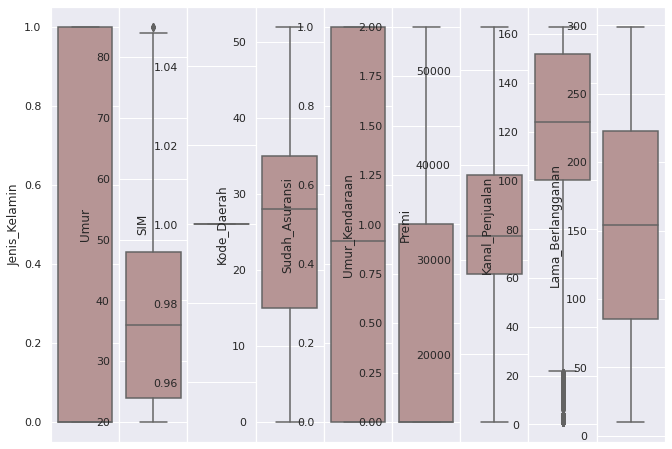

In [ ]:
#outlier
def Check_outlierdone(data):
  plt.figure(figsize=(60, 60))
  f, axes = plt.subplots(1, 9)
  sns.boxplot(y= data['Jenis_Kelamin'], ax= axes[0], color='rosybrown')
  sns.boxplot(y= data['Umur'], ax= axes[1], color='rosybrown')
  sns.boxplot(y= data['SIM'], ax=axes[2], color='rosybrown')
  sns.boxplot(y= data['Kode_Daerah'], ax=axes[3], color='rosybrown')
  sns.boxplot(y= data['Sudah_Asuransi'], ax=axes[4], color='rosybrown')
  sns.boxplot(y= data['Umur_Kendaraan'], ax=axes[5], color='rosybrown')
  sns.boxplot(y= data['Premi'], ax=axes[6], color='rosybrown')
  sns.boxplot(y= data['Kanal_Penjualan'], ax=axes[7], color='rosybrown')
  sns.boxplot(y= data['Lama_Berlangganan'], ax=axes[8], color='rosybrown')
  plt.subplots_adjust(wspace=0)

Check_outlierdone(DataTrain)

### clean Test

In [ ]:
DataTest.fillna(DataTest.mean(), inplace=True)
DataTest.head(3)
DataTest.isna().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

In [ ]:
DataTest['Jenis_Kelamin']= LabelEncoder().fit_transform(DataTest['Jenis_Kelamin']) 
DataTest['Umur_Kendaraan']= LabelEncoder().fit_transform(DataTest['Umur_Kendaraan']) 
# DataTest['Kendaraan_Rusak']= LabelEncoder().fit_transform(DataTest['Kendaraan_Rusak']) 

DataTest['Kendaraan_Rusak'] = (DataTest['Kendaraan_Rusak']=='Pernah').astype(int)

DataTest.head(3)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,49,1,8,0,0,1,46963,26,145,0
1,0,22,1,47,1,1,0,39624,152,241,0
2,0,24,1,28,1,1,0,110479,152,62,0


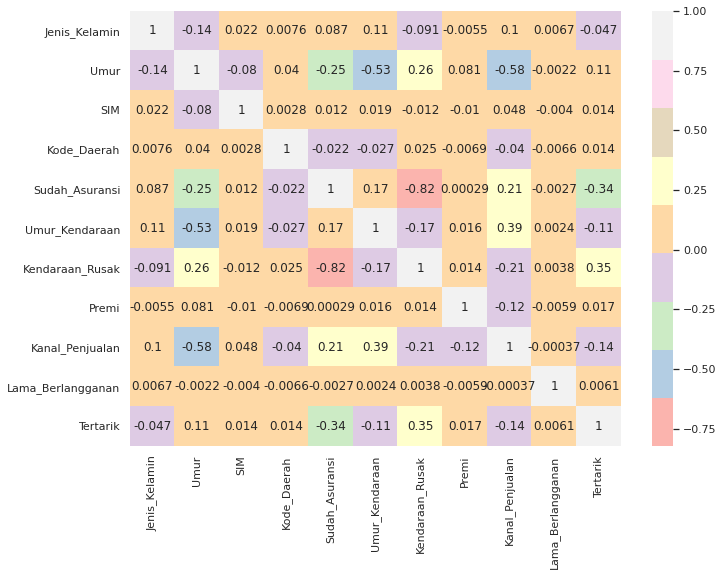

In [ ]:
#check correlation
heatmap(DataTest)

<Figure size 4320x4320 with 0 Axes>

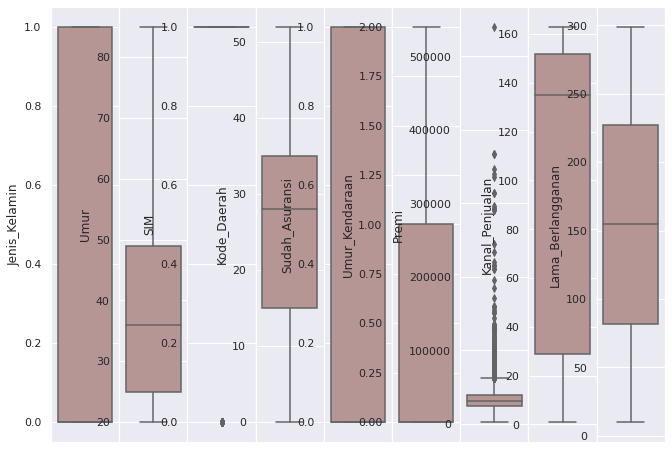

In [ ]:
#outlier
Check_outlier(DataTest)

## clean data

In [ ]:
#handle outlier 
while True:
  qlo1, qlo3 = np.percentile(DataTest['SIM'],[25,75])
  iqrlo = qlo3 - qlo1
  lowerlo = qlo1 - (1.5 * iqrlo)
  upperlo = qlo3 + (1.5 * iqrlo)
  outlierlo = DataTest[(DataTest['SIM'] < (lowerlo)) | (DataTest['SIM'] > (upperlo))]
  print('amount of outlier data',outlierlo.shape[0]) #amount of outlier data
  idxlo = outlierlo.index
  DataTest.drop(idxlo, inplace=True) #drop outlier data
  if (outlierlo.shape[0] <= 0):
    break

DataTest['SIM'].describe()

amount of outlier data 99
amount of outlier data 0


count    47540.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: SIM, dtype: float64

In [ ]:
#handle outlier 
while True:
  qlo1, qlo3 = np.percentile(DataTest['Premi'],[25,75])
  iqrlo = qlo3 - qlo1
  lowerlo = qlo1 - (1.5 * iqrlo)
  upperlo = qlo3 + (1.5 * iqrlo)
  outlierlo = DataTest[(DataTest['Premi'] < (lowerlo)) | (DataTest['Premi'] > (upperlo))]
  print('amount of outlier data',outlierlo.shape[0]) #amount of outlier data
  idxlo = outlierlo.index
  DataTest.drop(idxlo, inplace=True) #drop outlier data
  if (outlierlo.shape[0] <= 0):
    break

DataTest['Premi'].describe()

amount of outlier data 1269
amount of outlier data 210
amount of outlier data 31
amount of outlier data 3
amount of outlier data 0


count    46027.000000
mean     29142.332653
std      14622.127210
min       2630.000000
25%      24015.000000
50%      31340.000000
75%      38484.000000
max      60183.000000
Name: Premi, dtype: float64

In [ ]:
#handle outlier 
while True:
  qlo1, qlo3 = np.percentile(DataTest['Umur'],[25,75])
  iqrlo = qlo3 - qlo1
  lowerlo = qlo1 - (1.5 * iqrlo)
  upperlo = qlo3 + (1.5 * iqrlo)
  outlierlo = DataTest[(DataTest['Umur'] < (lowerlo)) | (DataTest['Umur'] > (upperlo))]
  print('amount of outlier data',outlierlo.shape[0]) #amount of outlier data
  idxlo = outlierlo.index
  DataTest.drop(idxlo, inplace=True) #drop outlier data
  if (outlierlo.shape[0] <= 0):
    break

DataTest['Umur'].describe()

amount of outlier data 0


count    46027.000000
mean        38.552480
std         15.416229
min         20.000000
25%         25.000000
50%         36.000000
75%         49.000000
max         85.000000
Name: Umur, dtype: float64

<Figure size 4320x4320 with 0 Axes>

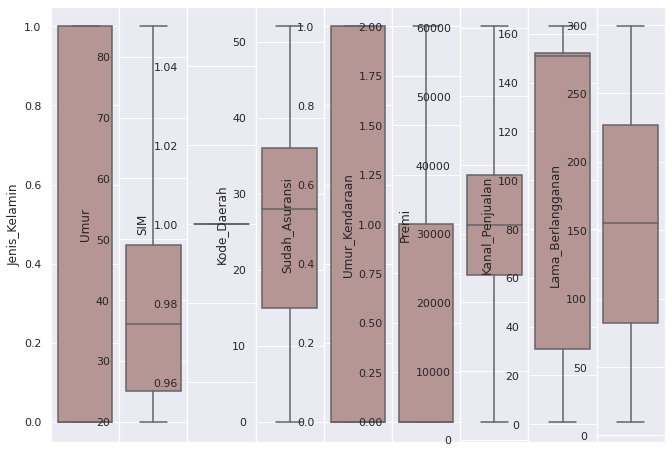

In [ ]:
#outlier
def Check_outlier(data):
  plt.figure(figsize=(60, 60))
  f, axes = plt.subplots(1, 9)
  sns.boxplot(y= DataTest['Jenis_Kelamin'], ax= axes[0], color='rosybrown')
  sns.boxplot(y= DataTest['Umur'], ax= axes[1], color='rosybrown')
  sns.boxplot(y= DataTest['SIM'], ax=axes[2], color='rosybrown')
  sns.boxplot(y= DataTest['Kode_Daerah'], ax=axes[3], color='rosybrown')
  sns.boxplot(y= DataTest['Sudah_Asuransi'], ax=axes[4], color='rosybrown')
  sns.boxplot(y= DataTest['Umur_Kendaraan'], ax=axes[5], color='rosybrown')
  sns.boxplot(y= DataTest['Premi'], ax=axes[6], color='rosybrown')
  sns.boxplot(y= DataTest['Kanal_Penjualan'], ax=axes[7], color='rosybrown')
  sns.boxplot(y= DataTest['Lama_Berlangganan'], ax=axes[8], color='rosybrown')
  plt.subplots_adjust(wspace=0)

Check_outlier(DataTest)

In [ ]:
print(len(DataTrain))
print(len(DataTest))

213398
46027


## Pemodelan

In [ ]:
DTrain = DataTrain[['Umur','Premi','Tertarik']]
DTrain.head()

,Umur,Premi,Tertarik
0,30.0,28029.0,0
1,48.0,25800.0,0
2,21.0,32733.0,0
4,50.0,34857.0,0
5,21.0,22735.0,0


In [ ]:
targetTrain = DTrain['Tertarik']
Train = DTrain.drop(["Tertarik"], axis=1)
Train.head(3)

,Umur,Premi
0,30.0,28029.0
1,48.0,25800.0
2,21.0,32733.0


In [ ]:
DTest = DataTest[['Umur','Premi','Tertarik']]
DTest.head()

,Umur,Premi,Tertarik
0,49,46963,0
1,22,39624,0
3,46,36266,0
4,35,26963,0
5,26,42721,0


In [ ]:
targetTest = DTest['Tertarik']
Test = DTest.drop(['Tertarik'], axis=1)
Test.head(3)

,Umur,Premi
0,49,46963
1,22,39624
3,46,36266


In [ ]:
print(targetTrain)
print(targetTest)

0         0
1         0
2         0
4         0
5         0
         ..
285826    0
285827    0
285828    0
285829    0
285830    0
Name: Tertarik, Length: 213398, dtype: int64
0        0
1        0
3        0
4        0
5        0
        ..
47634    0
47635    0
47636    0
47637    1
47638    0
Name: Tertarik, Length: 46027, dtype: int64


### Split data

In [ ]:
Xtrain, ytrain = Train[:], targetTrain
Xtest, ytest = Test[:], targetTest

In [ ]:
Xtrain = Xtrain.values
Xtest = Xtest.values
ytrain = ytrain.values
ytest = ytest.values

In [ ]:
Xtrain

array([[3.0000e+01, 2.8029e+04],
       [4.8000e+01, 2.5800e+04],
       [2.1000e+01, 3.2733e+04],
       ...,
       [2.3000e+01, 4.9751e+04],
       [6.8000e+01, 3.0503e+04],
       [4.5000e+01, 3.6480e+04]])

In [ ]:
Xtest

array([[   49, 46963],
       [   22, 39624],
       [   46, 36266],
       ...,
       [   24, 33101],
       [   59, 37788],
       [   52,  2630]])

In [ ]:
ytrain

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
ytest

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
len(Xtest)

46027

In [ ]:
len(ytest)

46027

### SVM

In [ ]:
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# import sklearn.metrics as metrics
svm = SVC()
svm.fit(Xtrain, ytrain)
SVM_pred = svm.predict(Xtest)
print("Support Vector Machine\n")
# for i in range(len(SVM_pred)):
#     print(SVM_pred[i])

print("F1-SCORE ",f1(ytest,SVM_pred,average='macro') * 100)

print("ACCURACY ",acc(ytest,SVM_pred) * 100)

print("PRECISION ",prec(ytest,SVM_pred,average='macro') * 100)

print("RECALL",recall(ytest,SVM_pred,average='macro') * 100)

Support Vector Machine

F1-SCORE  46.73848895471956
ACCURACY  87.75284072392292
PRECISION  43.87642036196146
RECALL 50.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
TestEvalSVM = DTest.copy()
TestEvalSVM['Hasil Prediksi SVM'] = SVM_pred

TestEvalSVM.head()

,Umur,Premi,Tertarik,Hasil Prediksi SVM
0,49,46963,0,0
1,22,39624,0,0
3,46,36266,0,0
4,35,26963,0,0
5,26,42721,0,0


### Evaluasi

In [ ]:
from sklearn import metrics

def confusion_metrics (y_test,y_pred):
    #Showing Confusion Matrix to know True Positive, False Positive, True Negative and False Negative   
    cm = metrics.confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(cm, 
                         columns = ['Predicted Negative', 'Predicted Positive'], 
                         index = ['Actual Negative', 'Actual Positive'])

    #Assign True Positive, False Positive, True Negative and False Negative intu variable
    TN = cm_df.loc['Actual Negative','Predicted Negative']
    FN = cm_df.loc['Actual Positive','Predicted Negative']
    FP = cm_df.loc['Actual Negative','Predicted Positive']
    TP = cm_df.loc['Actual Positive','Predicted Positive']
    
    print('True Negative  : ',TN)
    print('False Negative : ',FN)
    print('False Positive : ',FP)
    print('True Positive  : ',TP)
    print('')
    
    #Find Precision, Recall, and F1-Score
    from sklearn.metrics import classification_report
    print(classification_report(y_test,y_pred))

In [ ]:
#confusion Metrics
confusion_metrics(ytest,SVM_pred)

True Negative  :  40390
False Negative :  5637
False Positive :  0
True Positive  :  0

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     40390
           1       0.00      0.00      0.00      5637

    accuracy                           0.88     46027
   macro avg       0.44      0.50      0.47     46027
weighted avg       0.77      0.88      0.82     46027



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Eksperimen

### Naive Bayes

In [ ]:
#Create a Gaussian Classifier
naive = GaussianNB()
# Train the model using the training sets
naive.fit(Xtrain, ytrain)
#Predict Output
NB_predict = naive.predict(Xtest)

# Accuracy score
print("NAIVE BAYES\n")
# for i in range(len(cn_predict)):
#     print(cn_predict[i])

print("F1-SCORE ",f1(ytest,NB_predict,average='macro') * 100)

print("ACCURACY ",acc(ytest,NB_predict) * 100)

print("PRECISION ",prec(ytest,NB_predict,average='macro') * 100)

print("RECALL",recall(ytest,NB_predict,average='macro') * 100)

NAIVE BAYES

F1-SCORE  46.73848895471956
ACCURACY  87.75284072392292
PRECISION  43.87642036196146
RECALL 50.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Hasil Prediksinya kan di variabel "cn_predict"
NB_predict

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#Dataframe Test sebelum ditambahkan hasil prediksi
DTest.head()

,Umur,Premi,Tertarik
0,49,46963,0
1,22,39624,0
3,46,36266,0
4,35,26963,0
5,26,42721,0


In [ ]:
TestEval = DTest.copy()
TestEval['Hasil Prediksi'] = NB_predict

TestEval.head()

,Umur,Premi,Tertarik,Hasil Prediksi
0,49,46963,0,0
1,22,39624,0,0
3,46,36266,0,0
4,35,26963,0,0
5,26,42721,0,0


In [ ]:
#confusion Metrics
confusion_metrics(ytest,NB_predict)

True Negative  :  40390
False Negative :  5637
False Positive :  0
True Positive  :  0

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     40390
           1       0.00      0.00      0.00      5637

    accuracy                           0.88     46027
   macro avg       0.44      0.50      0.47     46027
weighted avg       0.77      0.88      0.82     46027



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Decision Tree

In [ ]:
# Create Decision Tree classifer object
d3 = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Train Decision Tree Classifer
d3 = d3.fit(Xtrain,ytrain)

#Predict the response for test dataset
d3_predict = d3.predict(Xtest)
# Accuracy score
print("DECISION TREE\n")
# for i in range(len(d3_predict)):
#     print(d3_predict[i])

print("F1-SCORE ",f1(ytest,d3_predict,average='macro') * 100)

print("ACCURACY ",acc(ytest,d3_predict) * 100)

print("PRECISION ",prec(ytest,d3_predict,average='macro') * 100)

print("RECALL",recall(ytest,d3_predict,average='macro') * 100)

DECISION TREE

F1-SCORE  46.73848895471956
ACCURACY  87.75284072392292
PRECISION  43.87642036196146
RECALL 50.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
TestEvalD3 = DTest.copy()
TestEvalD3['Hasil Prediksi D3'] = d3_predict

TestEvalD3.head()

,Umur,Premi,Tertarik,Hasil Prediksi D3
0,49,46963,0,0
1,22,39624,0,0
3,46,36266,0,0
4,35,26963,0,0
5,26,42721,0,0


In [ ]:
#confusion Metrics
confusion_metrics(ytest,d3_predict)

True Negative  :  40390
False Negative :  5637
False Positive :  0
True Positive  :  0

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     40390
           1       0.00      0.00      0.00      5637

    accuracy                           0.88     46027
   macro avg       0.44      0.50      0.47     46027
weighted avg       0.77      0.88      0.82     46027



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Random Forest

In [ ]:
rf = RandomForestClassifier().fit(Xtrain, ytrain)
# report.metrics(rf)
rf_predict = rf.predict(Xtest)

print("Random Forest\n")
# for i in range(len(cd_predict)):
#     print(cd_predict[i])

print("F1-SCORE ",f1(ytest,rf_predict,average='macro') * 100)
print("ACCURACY ",acc(ytest,rf_predict) * 100)
print("PRECISION ",prec(ytest,rf_predict,average='macro') * 100)
print("RECALL",recall(ytest,rf_predict,average='macro') * 100)

Random Forest

F1-SCORE  52.33918182782682
ACCURACY  81.33269602624547
PRECISION  52.68925353917903
RECALL 52.20332005100352


In [ ]:
TestEvalRF = DTest.copy()
TestEvalRF['Hasil Prediksi RF'] = rf_predict

TestEvalRF.head()

,Umur,Premi,Tertarik,Hasil Prediksi RF
0,49,46963,0,0
1,22,39624,0,0
3,46,36266,0,0
4,35,26963,0,0
5,26,42721,0,0


In [ ]:
#confusion Metrics
confusion_metrics(ytest,rf_predict)

True Negative  :  36667
False Negative :  4869
False Positive :  3723
True Positive  :  768

              precision    recall  f1-score   support

           0       0.88      0.91      0.90     40390
           1       0.17      0.14      0.15      5637

    accuracy                           0.81     46027
   macro avg       0.53      0.52      0.52     46027
weighted avg       0.80      0.81      0.80     46027



### KNN

In [ ]:
#Create a KNeighbors Classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model using the training sets
knn.fit(Xtrain,ytrain)

#Predict Output
knn_predict = knn.predict(Xtest)

# Accuracy score
print("K NEAREST NEIGHBOR\n")
# for i in range(len(knn_predict)):
#     print(knn_predict[i])

print("F1-SCORE ",f1(ytest,knn_predict,average='macro') * 100)

print("ACCURACY ",acc(ytest,knn_predict) * 100)

print("PRECISION ",prec(ytest,knn_predict,average='macro') * 100)

print("RECALL",recall(ytest,knn_predict,average='macro') * 100)

K NEAREST NEIGHBOR

F1-SCORE  49.60810707274225
ACCURACY  86.57309839876595
PRECISION  54.97180311252081
RECALL 50.9534276040115


In [ ]:
TestEvalKNN = DTest.copy()
TestEvalKNN['Hasil Prediksi KNN'] = knn_predict

TestEvalKNN.head()

,Umur,Premi,Tertarik,Hasil Prediksi KNN
0,49,46963,0,0
1,22,39624,0,0
3,46,36266,0,0
4,35,26963,0,0
5,26,42721,0,0


In [ ]:
#confusion Metrics
confusion_metrics(ytest,knn_predict)

True Negative  :  39634
False Negative :  5424
False Positive :  756
True Positive  :  213

              precision    recall  f1-score   support

           0       0.88      0.98      0.93     40390
           1       0.22      0.04      0.06      5637

    accuracy                           0.87     46027
   macro avg       0.55      0.51      0.50     46027
weighted avg       0.80      0.87      0.82     46027



eval model
# New Section

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
# from sklearn.linear_model import LogisticRegression

# classifiers = [
#              KNeighborsClassifier(3),
#              DecisionTreeClassifier(),
#              RandomForestClassifier(),
#              AdaBoostClassifier(),
#              GradientBoostingClassifier(),
#              GaussianNB(),
#              LinearDiscriminantAnalysis(),
#              QuadraticDiscriminantAnalysis(),
#              LogisticRegression() 
# ]

# log_cols = ["Classifier", "Accuracy"]
# log = pd.DataFrame(columns=log_cols)

In [ ]:
# acc_dict = {}


# for clf in classifiers:
#   name = clf.__class__.__name__
#   clf.fit(Xtrain,ytrain)
#   pred = clf.predict(Xtest)
#   acc = acc(ytest, pred)
#   if name in acc_dict:
#     acc_dict[name]+= acc
#   else:
#     acc_dict[name]= acc

# for clf in acc_dict:
#   acc_dict[clf] = acc_dict[clf]*100
#   log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns= log_cols)
#   log = log.append(log_entry)


# sns.set_color_codes("muted")
# sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")